In [1]:
#import required libraries
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
matplotlib.style.use('ggplot')

In [2]:
#import nltk libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [4]:
#Load the Data
df_train=pd.read_csv('/content/price_train.csv')
df_test = pd.read_csv('/content/price_test.csv')
data = df_test

In [5]:
df_train['is_train'] = True
# df_test = pd.read_csv('/content/price_test.csv')
df_test['is_train'] = False

In [6]:
#There is aa row where the price of a room is 0. Let us consider it as dirty data
df_train =df_train[df_train['bedrooms']!=0].dropna(axis = 0)
df_train =df_train[df_train['bathrooms']!=0].dropna(axis = 0)
df_train =df_train[df_train['accommodates']!=0].dropna(axis = 0)
df_train =df_train[df_train['price']!=0].dropna(axis = 0)

In [7]:
frames = [df_train, df_test]
df = pd.concat(frames, axis=0, ignore_index=True)

In [8]:
df.tail(5)

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,is_train
4744,4349,19350610,False,92%,within an hour,51,True,3,University District,Apartment,Entire home/apt,47.658539,-122.316761,1,1.0,1,1,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",$60.00,2,1125,False,moderate,NaN,False
4745,1580,7886656,True,100%,within an hour,2,True,4,West Seattle,Apartment,Entire home/apt,47.559256,-122.384556,1,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",$50.00,2,29,True,moderate,NaN,False
4746,679,3535171,True,100%,within an hour,2,True,2,Other neighborhoods,House,Private room,47.687966,-122.352905,1,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Pets live on this property""...",$25.00,1,29,False,strict_14_with_grace_period,NaN,False
4747,7360,27930170,False,100%,within an hour,1,False,4,Central Area,Guest suite,Entire home/apt,47.615843,-122.299203,2,1.0,1,2,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",""Free...",$75.00,3,1125,True,strict_14_with_grace_period,NaN,False
4748,4685,20256234,True,100%,within an hour,2,False,6,Northgate,House,Entire home/apt,47.730638,-122.329604,4,2.0,3,3,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$100.00,3,1125,True,strict_14_with_grace_period,NaN,False


In [9]:
df.shape

(4749, 26)

# Understand the Problem Statement
To work on the following data we have tooo understand the following
- What data do we have?
- What missing values do we have, if any, how do we deal with them? Upon considering the misssing values we can consider the following:
 - Reform the information and imput missing values.
 - Delete the data tht might not be needed.

# Acknowledgement
The data can be found by clinking <a href="https://drive.google.com/file/d/19Le60dm7hz7zy72Oc3vPiN11n71ISi3z/view?usp=sharing">here</a>




In [10]:
df.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price', 'is_train'],
      dtype='object')

In [11]:
df.describe()

,X1,id,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,minimum_nights,maximum_nights
count,4749.000000,4.749000e+03,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000
mean,4426.145083,1.815911e+07,64.691725,3.857233,47.624821,-122.334132,2.152664,1.329964,1.506633,2.027374,3.333123,594.172247
std,2499.284609,8.976445e+06,201.814363,2.454867,0.045847,0.031865,1.836878,0.659795,0.980329,1.559305,9.526567,546.624819
min,0.000000,2.318000e+03,0.000000,1.000000,47.496037,-122.419637,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2229.000000,1.139268e+07,1.000000,2.000000,47.604842,-122.354173,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000
50%,4603.000000,2.003153e+07,2.000000,3.000000,47.621092,-122.332824,2.000000,1.000000,1.000000,2.000000,2.000000,365.000000
75%,6609.000000,2.520392e+07,9.000000,5.000000,47.659006,-122.312058,2.000000,1.500000,2.000000,2.000000,2.000000,1125.000000
max,8456.000000,3.223951e+07,1596.000000,28.000000,47.733955,-122.232314,16.000000,8.000000,8.000000,20.000000,330.000000,10000.000000


In [12]:
df.isnull().sum()

X1                                 0
id                                 0
host_is_superhost                  0
host_response_rate                 0
host_response_time                 0
host_listings_count                0
host_identity_verified             0
accommodates                       0
neighbourhood_group_cleansed       0
property_type                      0
room_type                          0
latitude                           0
longitude                          0
guests_included                    0
bathrooms                          0
bedrooms                           0
beds                               0
bed_type                           0
amenities                          0
cleaning_fee                       0
minimum_nights                     0
maximum_nights                     0
instant_bookable                   0
cancellation_policy                0
price                           1734
is_train                           0
dtype: int64

##Cleaning the data
The first task is to clean the data. The steps followed in cleaning data are:

- Replace NaN values with 0 (But in the above data we havent found null values)
- Converting prices to float (Remove the dollar signs)


In [13]:
#Extracting price from the table
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].astype(float)

#Extracting host_response_rate from the table
host_response_rate = df['host_response_rate']
host_response_rates=[]

#clean the data to make it float
for p in host_response_rate:
    p=float(p[:-1].replace(',',''))
    host_response_rates.append(p)

#replace the host_response_rate column with the new column
df['host_response_rate']=host_response_rates



#Extracting cleaning_fee from the table
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',', '')
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
df['cleaning_fee'] = df['cleaning_fee'].astype(float)

#Convert True and False Values Values to 0 and 1
(df['host_is_superhost'] == 'TRUE').astype(int)
(df['host_identity_verified'] == 'TRUE').astype(int)
(df['instant_bookable'] == 'TRUE').astype(int)


0       0
1       0
2       0
3       0
4       0
       ..
4744    0
4745    0
4746    0
4747    0
4748    0
Name: instant_bookable, Length: 4749, dtype: int64

In [14]:
df.describe()

,X1,id,host_response_rate,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,price
count,4749.000000,4.749000e+03,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,3015.000000
mean,4426.145083,1.815911e+07,97.831122,64.691725,3.857233,47.624821,-122.334132,2.152664,1.329964,1.506633,2.027374,71.720994,3.333123,594.172247,164.842123
std,2499.284609,8.976445e+06,10.446241,201.814363,2.454867,0.045847,0.031865,1.836878,0.659795,0.980329,1.559305,60.509490,9.526567,546.624819,165.358699
min,0.000000,2.318000e+03,0.000000,0.000000,1.000000,47.496037,-122.419637,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2229.000000,1.139268e+07,100.000000,1.000000,2.000000,47.604842,-122.354173,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,30.000000,77.000000
50%,4603.000000,2.003153e+07,100.000000,2.000000,3.000000,47.621092,-122.332824,2.000000,1.000000,1.000000,2.000000,60.000000,2.000000,365.000000,119.000000
75%,6609.000000,2.520392e+07,100.000000,9.000000,5.000000,47.659006,-122.312058,2.000000,1.500000,2.000000,2.000000,99.000000,2.000000,1125.000000,195.000000
max,8456.000000,3.223951e+07,100.000000,1596.000000,28.000000,47.733955,-122.232314,16.000000,8.000000,8.000000,20.000000,499.000000,330.000000,10000.000000,1650.000000


In [15]:
df.shape

(4749, 26)

#Correlation between Price and Other Features
From the correlations heatmap diagram we can see that price is correlated with number of accomodates, bathrooms, bedrooms and beds. And it's reasonable because the more area is, the high price is!

In [16]:
corr = df.corr()
corr

,X1,id,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,price,is_train
X1,1.000000,0.992800,-0.132641,0.020785,0.076860,-0.402355,0.039979,-0.063492,-0.007643,0.011698,-0.015186,0.019019,0.028944,0.028863,-0.010128,0.020437,0.234906,0.032073,0.005912
id,0.992800,1.000000,-0.132602,0.022300,0.083940,-0.402885,0.040444,-0.065531,-0.007895,0.015209,-0.014410,0.018756,0.028074,0.030629,-0.012139,0.024879,0.237798,0.037357,0.007114
host_is_superhost,-0.132641,-0.132602,1.000000,0.120057,-0.248110,0.203872,0.029352,0.030843,-0.019942,0.008858,-0.049625,0.007470,0.014738,-0.034834,-0.047979,-0.148086,-0.115043,-0.092027,0.009198
host_response_rate,0.020785,0.022300,0.120057,1.000000,0.037928,-0.040597,0.026861,0.010817,0.016243,0.028444,-0.004335,0.006362,0.013188,0.030324,-0.045881,-0.031060,0.096431,0.018000,0.016211
host_listings_count,0.076860,0.083940,-0.248110,0.037928,1.000000,-0.222654,0.014373,-0.069233,-0.030272,0.045657,0.020380,-0.036479,-0.037461,0.137107,0.019115,0.176498,0.187952,0.559988,0.021865
host_identity_verified,-0.402355,-0.402885,0.203872,-0.040597,-0.222654,1.000000,-0.018317,0.046397,0.003538,-0.015775,0.036712,0.008183,0.001944,-0.078409,0.029516,-0.060980,-0.309736,-0.133244,-0.012731
accommodates,0.039979,0.040444,0.029352,0.026861,0.014373,-0.018317,1.000000,0.000113,-0.043038,0.664243,0.542134,0.831362,0.858417,0.629542,-0.043337,0.055303,0.031181,0.501559,0.041594
latitude,-0.063492,-0.065531,0.030843,0.010817,-0.069233,0.046397,0.000113,1.000000,-0.161952,-0.003925,0.013107,0.015279,0.015482,0.006810,0.029217,-0.008284,-0.032412,-0.033230,0.019608
longitude,-0.007643,-0.007895,-0.019942,0.016243,-0.030272,0.003538,-0.043038,-0.161952,1.000000,-0.050200,-0.020495,-0.028811,-0.037062,-0.090707,0.003162,-0.002311,0.013013,-0.078649,-0.003692
guests_included,0.011698,0.015209,0.008858,0.028444,0.045657,-0.015775,0.664243,-0.003925,-0.050200,1.000000,0.407736,0.600319,0.584372,0.515706,-0.034452,0.032787,0.049780,0.398187,0.037080


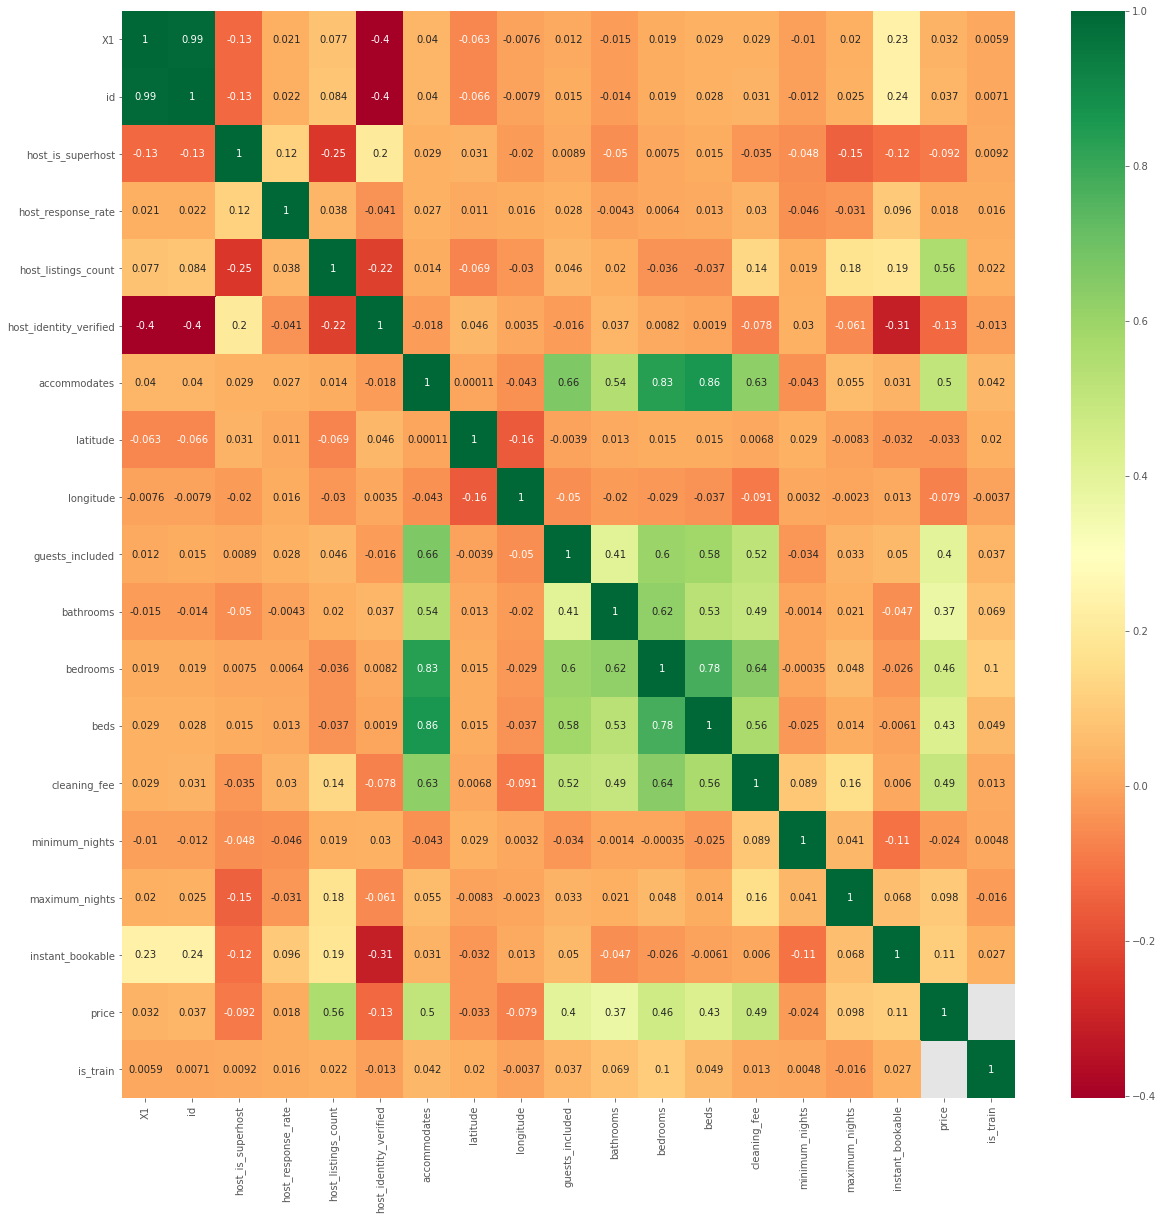

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True, cmap="RdYlGn")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

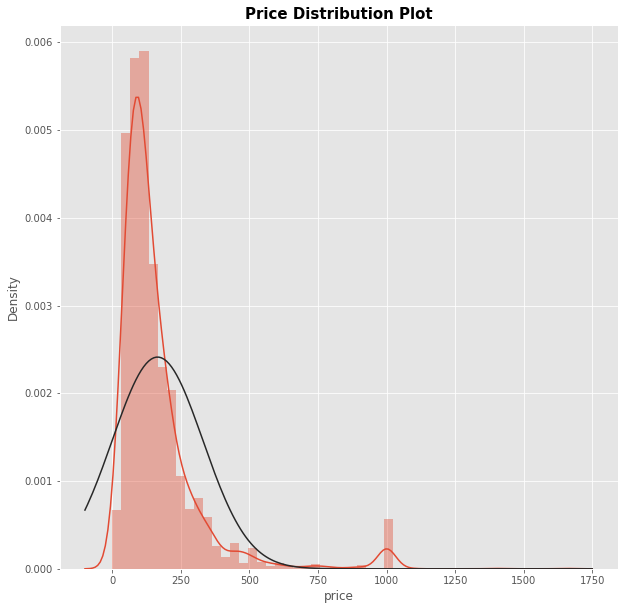

In [18]:
plt.figure(figsize=(10,10))
sns.distplot(df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

##Conclusion from the above grapgh
The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

Since division by zero is a problem, log+1 transformation would be better.

In [19]:
df['price_log'] = df['price']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

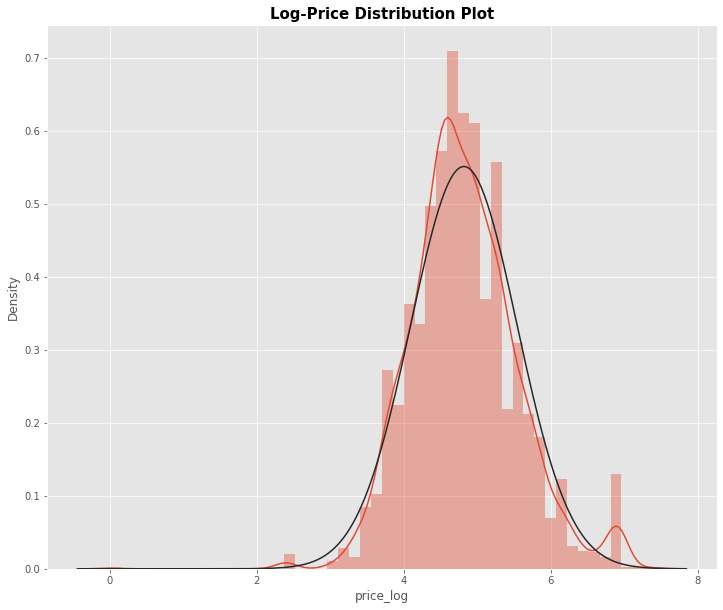

In [20]:
df['price_log'] = np.log(df.price_log+1)
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

Now we have normal distribution using logarithmic transformation.

#Visualization
Let us have do some more Visualization on the data set.


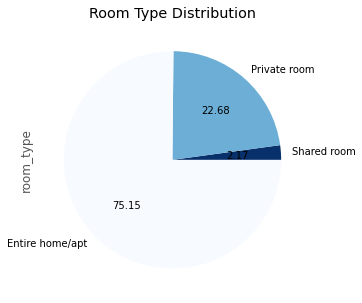

In [21]:
room = df['room_type']
r = Counter(room)

room_input = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_input.columns = ['room_type']
room_input.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(5,5), 
                 fontsize = 10, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

#Conclusion from the above Pie Chart 
plot room type to see how many data belong to each group. Below we can see that the below dataset conntains
- Shared Room: 2.25%
- Private Room: 21.35%
- Entire home/apt: 76.40%

Text(0, 0.5, 'Number of listings')

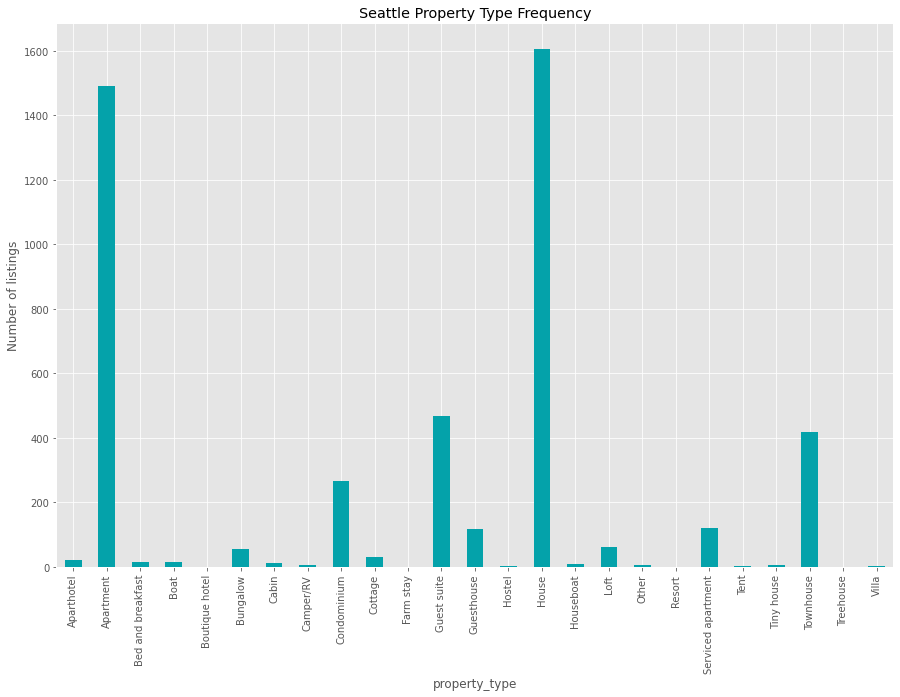

In [22]:
property_type_input = df.groupby('property_type').id.count()
property_type_input = property_type_input.reset_index()
property_type_input = property_type_input.rename(columns={'id':'Number_Of_Listings'})

objects = property_type_input['property_type']
y_pos = property_type_input['Number_Of_Listings']

property_type_input.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#04a2aa', 
           figsize =(15,10), 
           title = 'Seattle Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')

##Conclusion from the above Bar graph
- Owners are more inclines to listing their property as a whole and not just a partt of their house.
- The data is filled with Apartment and House although there are other peoperty type listed here and there.

In [23]:
property_room_type = df.groupby(['property_type','room_type']).price.mean()
property_room_type = property_room_type.reset_index()
property_room_type=property_room_type.sort_values('price',ascending=[0])
property_room_type.head()

,property_type,room_type,price
8,Boutique hotel,Private room,399.000000
48,Villa,Entire home/apt,298.000000
27,House,Entire home/apt,237.632327
44,Townhouse,Entire home/apt,228.852941
18,Cottage,Entire home/apt,213.250000


Text(0.5, 1.0, 'Room Type vs Price')

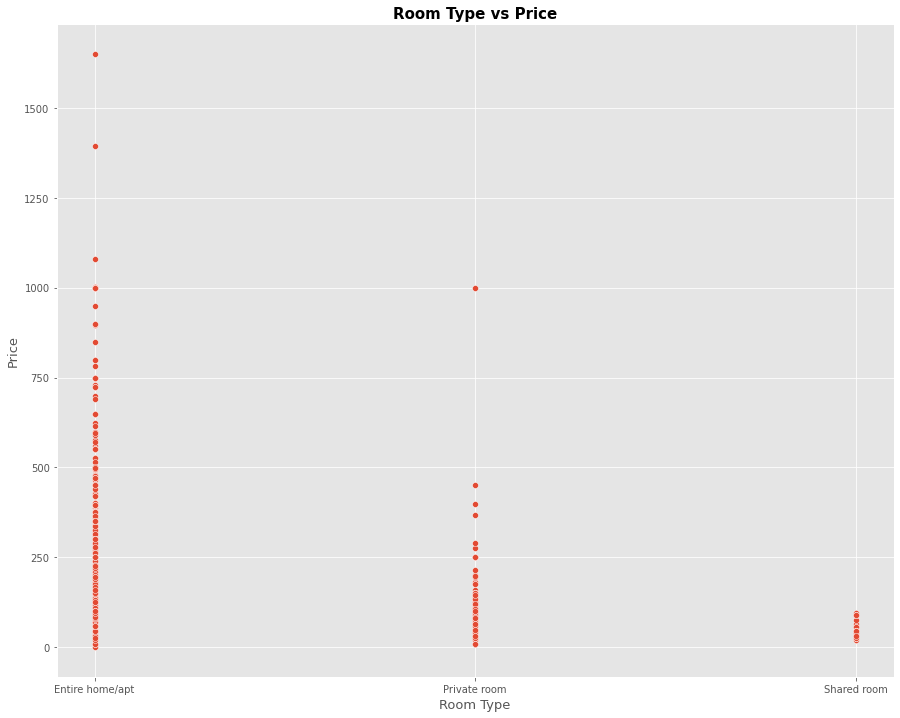

In [24]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

Conclusion from the above Scatter Plot:
- Owners who are offerring their Entire home/apt are going from low to high price range.
- Owner who are offerring Private Room are going from low to  medium price range.
- Owners who are offering Shared Rooms are going for low rates.

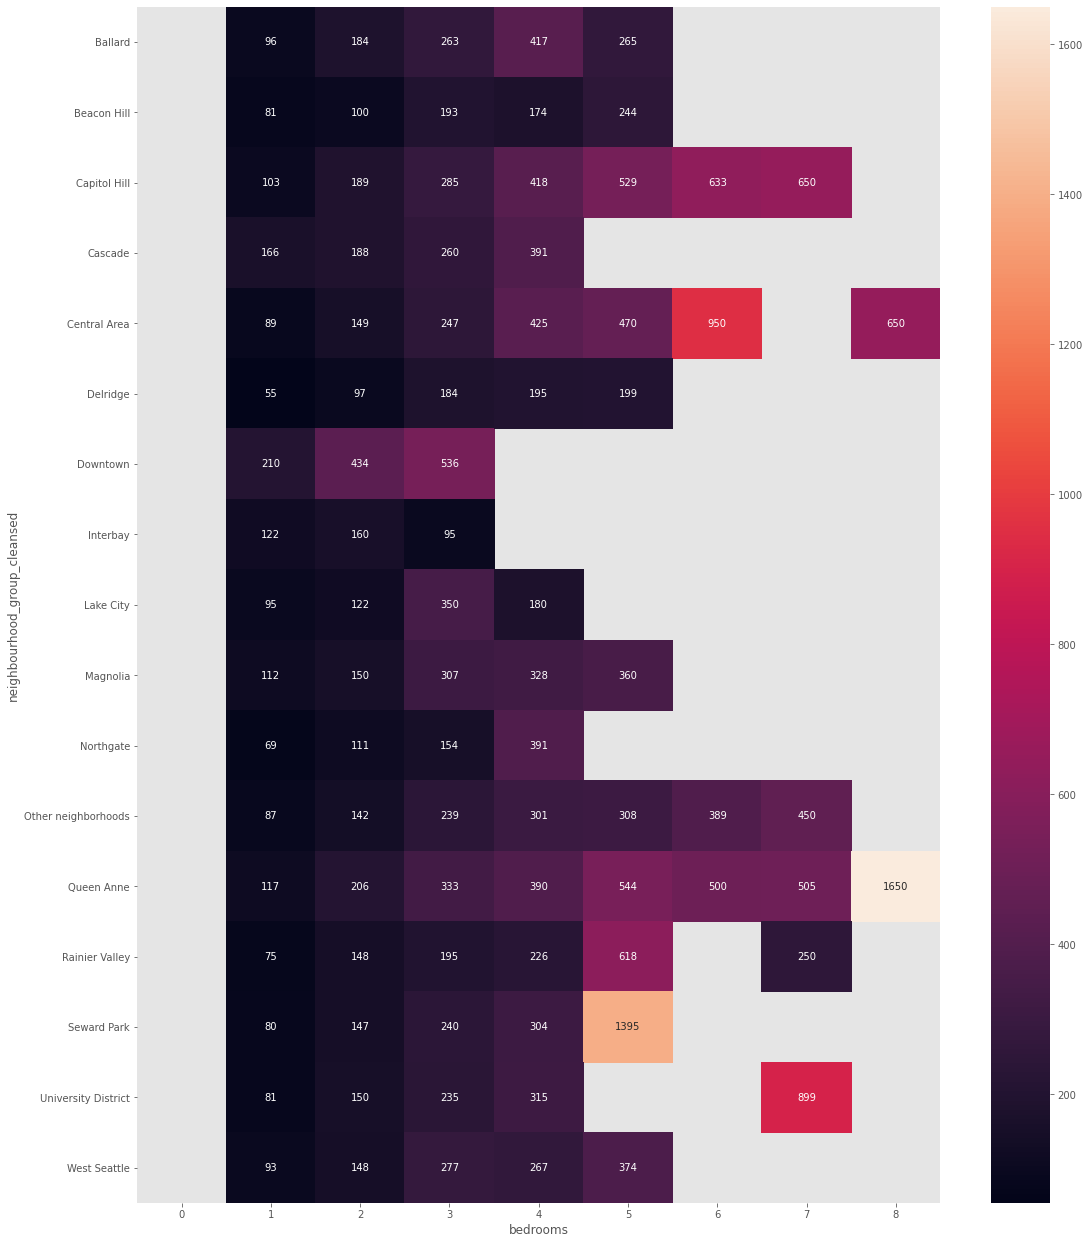

In [25]:
plt.figure(figsize=(18,22))
ax = sns.heatmap(df.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")
ax

##Conclusion from the above heatmap
It can be analyzed that with the increase in the number of bedrooms price of listing increases. Although, it depends upon the neighbourhood as well(Although there are lot of ouliers in neighbouhood as well).

#Let us see which features are important while training the model
- We will use and import sklearn library

In [26]:
df_modified = df
df_modified.shape

(4749, 27)

In [27]:
df_modified = df_modified[['room_type','host_listings_count', 'cleaning_fee','bedrooms', 'accommodates','bathrooms','guests_included', 'cancellation_policy','is_train']]
df_modified

,room_type,host_listings_count,cleaning_fee,bedrooms,accommodates,bathrooms,guests_included,cancellation_policy,is_train
0,Entire home/apt,521,129.0,2,5,2.0,4,strict,True
1,Entire home/apt,1,25.0,1,4,1.0,2,moderate,True
2,Private room,1,0.0,1,2,1.0,1,flexible,True
3,Entire home/apt,4,99.0,3,8,2.5,6,flexible,True
4,Entire home/apt,4,100.0,3,8,3.5,6,strict_14_with_grace_period,True
...,...,...,...,...,...,...,...,...,...
4744,Entire home/apt,51,60.0,1,3,1.0,1,moderate,False
4745,Entire home/apt,2,50.0,2,4,1.0,1,moderate,False
4746,Private room,2,25.0,1,2,1.0,1,strict_14_with_grace_period,False
4747,Entire home/apt,1,75.0,1,4,1.0,2,strict_14_with_grace_period,False


#Label Encoding
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [28]:
label_encoder = preprocessing.LabelEncoder()
df_modified['room_type']= label_encoder.fit_transform(df_modified["room_type"]) 
df_modified['cancellation_policy']= label_encoder.fit_transform(df_modified["cancellation_policy"]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#SPLIT THE CONCATNATED TRAIN AND TEST DATASET



In [29]:
df_train = df_modified.loc[df_modified['is_train'] == True]
df_test = df_modified.loc[df_modified['is_train'] == False]
df_train.drop(['is_train'],axis=1, inplace= True)
df_test.drop(['is_train'],axis=1, inplace= True)
df_train.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(3015, 8)

In [30]:
df_train_x, df_train_y = df_train.iloc[:,:-1], df_train.iloc[:,-1]
df_test_x, df_test_y = df_test.iloc[:,:-1], df_test.iloc[:,-1]

In [31]:
df_train_x.head()

,room_type,host_listings_count,cleaning_fee,bedrooms,accommodates,bathrooms,guests_included
0,0,521,129.0,2,5,2.0,4
1,0,1,25.0,1,4,1.0,2
2,1,1,0.0,1,2,1.0,1
3,0,4,99.0,3,8,2.5,6
4,0,4,100.0,3,8,3.5,6


#Undertsand Which Fetures are Important!

In [32]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(df_train_x,df_train_y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [33]:
#find which fetures are more important
print(model.feature_importances_)

[0.03673857 0.33728733 0.29802776 0.04881767 0.11715891 0.07097634
 0.09099342]


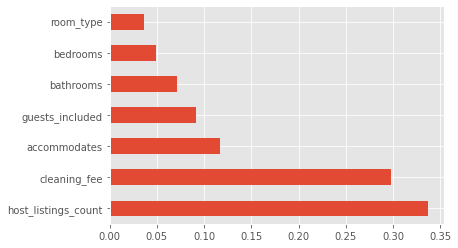

In [34]:
feat_importances = pd.Series(model.feature_importances_, index=df_train_x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From the above graph we can see that these are the top 10 features that can help us select what columns to consider in Decision Tree.

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


#HYPERPARAMETER TUNING

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [39]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [41]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [42]:
rf_random.fit(df_train_x,df_train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [43]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1100}

In [44]:
rf_random.best_score_

-0.9328513487582233

In [45]:
def ridge_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Ridge= Ridge()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(input_x, input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_  
    best_score_Ridge = grid_search_Ridge.best_score_ 
    print(best_parameters_Ridge)
    print(best_score_Ridge)
ridge_reg(df_train_x, df_train_y, cv=5)

{'alpha': 0.01, 'normalize': True}
-1.2293960770789474


In [46]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)
lasso_reg(df_train_x, df_train_y, cv=5)

{'alpha': 0.001, 'normalize': False}
-1.2295129423657933


In [47]:
### ElasticNet Regression ###

def elastic_reg(input_x, input_y,cv=5):
    ## Defining parameters
    model_grid_Elastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_elastic.fit(input_x, input_y)
    best_parameters_elastic = grid_search_elastic.best_params_  
    best_score_elastic = grid_search_elastic.best_score_ 
    print(best_parameters_elastic)
    print(best_score_elastic)
elastic_reg(df_train_x, df_train_y, cv=5)

{'alpha': 0.001, 'normalize': False}
-1.2295106110950296


In [48]:
###Linear Regression
lr_x = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr_x.fit(df_train_x, df_train_y)
lr_pred_x= lr_x.predict(df_test_x)

###Ridge
ridge_x = Ridge(alpha = 0.01, normalize = True)
ridge_x.fit(df_train_x, df_train_y)           
pred_ridge_x = ridge_x.predict(df_test_x) 

###Lasso
Lasso_x = Lasso(alpha = 0.001, normalize =False)
Lasso_x.fit(df_train_x, df_train_y)
pred_Lasso_x = Lasso_x.predict(df_test_x) 

##ElasticNet
model_enet_x = ElasticNet(alpha = 0.01, normalize=False)
model_enet_x.fit(df_train_x, df_train_y) 
pred_train_enet_x= model_enet_x.predict(df_train_x)
pred_test_enet_x= model_enet_x.predict(df_test_x)

In [49]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(df_train_x, df_train_y)
lr_pred= lr.predict(df_test_x)
print(lr_pred)
#Ridge Model
ridge_model = Ridge(alpha = 0.01, normalize = True)
ridge_model.fit(df_train_x, df_train_y)             
pred_ridge = ridge_model.predict(df_test_x) 
print(pred_ridge)
#Lasso Model
Lasso_model = Lasso(alpha = 0.001, normalize =False)
Lasso_model.fit(df_train_x, df_train_y)
pred_Lasso = Lasso_model.predict(df_test_x) 

#ElasticNet Model
model_enet = ElasticNet(alpha = 0.01, normalize=False)
model_enet.fit(df_train_x, df_train_y) 
pred_test_enet= model_enet.predict(df_test_x)

[1.52777094 1.42291576 2.23051739 ... 1.3609061  1.7494195  1.59753737]
[1.53730172 1.41802712 2.21503292 ... 1.36036512 1.73778918 1.6162466 ]


In [50]:
predictions=rf_random.predict(df_test_x)
print(predictions)
print(type(predictions))

[1.78400479 1.10098211 1.48693162 ... 1.11607072 1.73789425 1.7621264 ]
<class 'numpy.ndarray'>


Mean Absolute Error (MAE) shows the difference between predictions and actual values.

Root Mean Square Error (RMSE) shows how accurately the model predicts the response.

R^2 will be calculated to find the goodness of fit measure.

In [51]:
print('---------------DecisionTree-------------------')

print('MAE:', metrics.mean_absolute_error(df_test_y, predictions))
print('MSE:', metrics.mean_squared_error(df_test_y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df_test_y, predictions)))
print('R2 %f' % r2_score(df_test_y, predictions))
print('Accuracy', rf_random.best_score_)

print('---------------Linear ---------------------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(df_test_y, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(df_test_y, lr_pred)))   
print('R2 %f' % r2_score(df_test_y, lr_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(df_test_y, lr_pred_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(df_test_y, lr_pred_x)))   
print('R2 %f' % r2_score(df_test_y, lr_pred_x))

print('---------------Ridge ---------------------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(df_test_y, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(df_test_y, pred_ridge)))   
print('R2 %f' % r2_score(df_test_y, pred_ridge))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(df_test_y, pred_ridge_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(df_test_y, pred_ridge_x)))   
print('R2 %f' % r2_score(df_test_y, pred_ridge_x))

print('---------------Lasso-----------------------')

print('--Phase-1--')
print('MAE: %f' % mean_absolute_error(df_test_y, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(df_test_y, pred_Lasso)))
print('R2 %f' % r2_score(df_test_y, pred_Lasso))

print('--Phase-2--')
print('MAE: %f' % mean_absolute_error(df_test_y, pred_Lasso_x))
print('RMSE: %f' % np.sqrt(mean_squared_error(df_test_y, pred_Lasso_x)))
print('R2 %f' % r2_score(df_test_y, pred_Lasso_x))

print('---------------ElasticNet-------------------')

print('--Phase-1 --')
print('MAE: %f' % mean_absolute_error(df_test_y,pred_test_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(df_test_y,pred_test_enet))) #RMSE
print('R2 %f' % r2_score(df_test_y, pred_test_enet))

print('--Phase-2--')
print('MAE: %f' % mean_absolute_error(df_test_y,pred_test_enet_x)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(df_test_y,pred_test_enet_x))) #RMSE
print('R2 %f' % r2_score(df_test_y, pred_test_enet_x))

# ---------------DecisionTree-------------------
# MAE: 0.7604437239900941
# MSE: 0.9557163104321913
# RMSE: 0.9776074418866662
# R2 0.339332


---------------DecisionTree-------------------
MAE: 0.7606538641621097
MSE: 0.9561492143230277
RMSE: 0.9778288266987365
R2 0.339032
Accuracy -0.9328513487582233
---------------Linear ---------------------
--Phase-1--
MAE: 0.938703
RMSE: 1.087538
R2 0.182396
--Phase-2--
MAE: 0.938703
RMSE: 1.087538
R2 0.182396
---------------Ridge ---------------------
--Phase-1--
MAE: 0.939518
RMSE: 1.087467
R2 0.182502
--Phase-2--
MAE: 0.939518
RMSE: 1.087467
R2 0.182502
---------------Lasso-----------------------
--Phase-1--
MAE: 0.938836
RMSE: 1.087608
R2 0.182291
--Phase-2--
MAE: 0.938836
RMSE: 1.087608
R2 0.182291
---------------ElasticNet-------------------
--Phase-1 --
MAE: 0.939612
RMSE: 1.088210
R2 0.181384
--Phase-2--
MAE: 0.939612
RMSE: 1.088210
R2 0.181384


The MAE value of 0 indicates no error on the model. In other words, there is a perfect prediction. The above results show that all predictions have great error especially in phase 2.
RMSE gives an idea of how much error the system typically makes in its predictions. The above results show that all models with each phase have significant errors.
R2 represents the proportion of the variance for a dependent variable that's explained by an independent variable. 

#From the above Result I can Choose Decision Trees

In [52]:
import math
predictions = np.array(predictions)
for i in range(len(predictions)):
  predictions[i]= 10**predictions[i]
# predictions = math.exp(predictions)
predictions


array([60.81417054, 12.61775543, 30.68538823, ..., 13.06383611,
       54.68827836, 57.82643237])

In [53]:
predictions = np.array(predictions)
predictions

array([60.81417054, 12.61775543, 30.68538823, ..., 13.06383611,
       54.68827836, 57.82643237])

In [54]:
data
id = data['id']
df_save = pd.DataFrame({'price': predictions})
df_save['id']  = id
df_save

,price,id
0,60.814171,392779
1,12.617755,12456183
2,30.685388,1851863
3,55.064379,23309878
4,4.059813,10768347
...,...,...
1729,31.170606,19350610
1730,18.649622,7886656
1731,13.063836,3535171
1732,54.688278,27930170


In [55]:
df_save.describe()

,price,id
count,1734.000000,1.734000e+03
mean,218.283952,1.807491e+07
std,676.283143,9.052766e+06
min,1.491596,2.318000e+03
25%,14.194901,1.125773e+07
50%,34.564116,2.005960e+07
75%,105.715578,2.519135e+07
max,8957.407101,3.223937e+07


In [56]:
df_save.to_csv (r'/content/export_dataframe.csv', index = False, header=True)